In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Redução de Dimensionalidade

In [3]:
## carregando o dataset
data,y = load_iris()['data'],load_iris()['target']
df = pd.DataFrame(data,columns=load_iris()['feature_names'])

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
## exemplo com o dataset completo

x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.4,random_state=42)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9833333333333333

In [6]:
## exemplo com PCA
pca = PCA(2)
x_reduced = pca.fit_transform(df)

x_train,x_test,y_train,y_test = train_test_split(x_reduced,y,test_size=0.4,random_state=42)

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9666666666666667

In [7]:
data_plot = (
    pd.DataFrame(x_reduced,columns=['pc1','pc2'])
    .assign(target = load_iris()['target'])
    .assign(target = lambda x: x.target.replace(dict(zip(range(3),load_iris()['target_names']))))
)

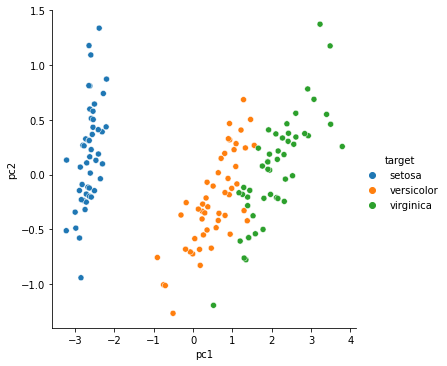

In [8]:
sns.relplot(x='pc1',y='pc2',hue='target',data=data_plot)
plt.show()

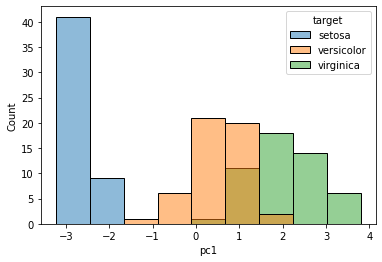

In [9]:
sns.histplot(x='pc1',hue='target',data=data_plot)
plt.show()